                       Test  Result       Reference Range  Abnormal
0               Cholesterol  167.00            <200 mg/dL     False
1         HDL CHOL., DIRECT   45.00             >50 mg/dL      True
2             Triglycerides   69.00            <150 mg/dL     False
3   HDL as % of Cholesterol   27.00                 >14 %     False
4            Chol/HDL Ratio    3.70                  <5.8     False
5             LDL/HDL Ratio    2.40                 <3.56     False
6           LDL Cholesterol  108.00            <100 mg/dL      True
7          VLDL, CALCULATED   14.00            7-32 mg/dL     False
8       Non-HDL Cholesterol  122.00            <130 mg/dL     False
9                       WBC    6.13  4.00-10.10 x10(3)/uL     False
10                      RBC    4.86   3.58-5.19 x10(6)/uL     False
11                      HGB   13.30        11.0-15.5 g/dL     False
12                      HCT   41.00           31.5-44.8 %     False
13                      MCV   84.40          78.

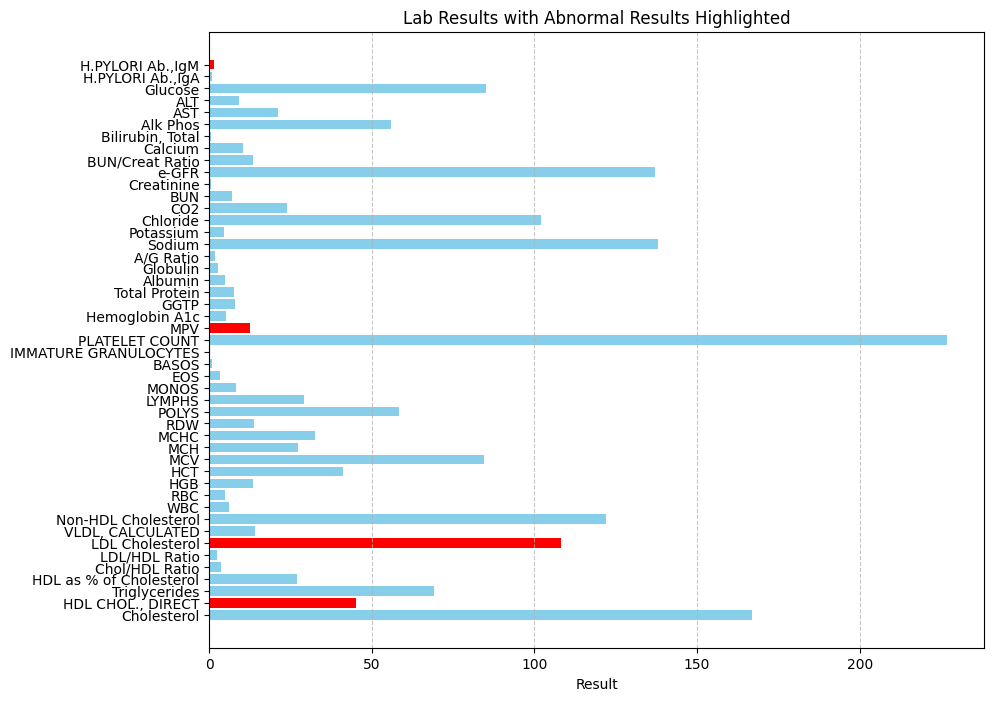

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct the data to ensure all lists are of the same length
data_corrected = {
    "Test": [
        "Cholesterol", "HDL CHOL., DIRECT", "Triglycerides", "HDL as % of Cholesterol", "Chol/HDL Ratio", "LDL/HDL Ratio", 
        "LDL Cholesterol", "VLDL, CALCULATED", "Non-HDL Cholesterol", "WBC", "RBC", "HGB", "HCT", "MCV", "MCH", "MCHC", 
        "RDW", "POLYS", "LYMPHS", "MONOS", "EOS", "BASOS", "IMMATURE GRANULOCYTES", "PLATELET COUNT", "MPV", "Hemoglobin A1c", 
        "GGTP", "Total Protein", "Albumin", "Globulin", "A/G Ratio", "Sodium", "Potassium", "Chloride", "CO2", "BUN", "Creatinine", 
        "e-GFR", "BUN/Creat Ratio", "Calcium", "Bilirubin, Total", "Alk Phos", "AST", "ALT", "Glucose", "H.PYLORI Ab.,IgA", "H.PYLORI Ab.,IgM"
    ],
    "Result": [
        167, 45, 69, 27, 3.7, 2.4, 108, 14, 122, 6.13, 4.86, 13.3, 41.0, 84.4, 27.4, 32.4, 13.7, 58.3, 29.0, 8.3, 3.4, 0.8, 
        0.2, 227, 12.4, 5.2, 8, 7.5, 4.8, 2.7, 1.8, 138, 4.5, 102, 24, 7, 0.52, 137, 13.5, 10.3, 0.5, 56, 21, 9, 85, 0.72, 1.45
    ],
    "Reference Range": [
        "<200 mg/dL", ">50 mg/dL", "<150 mg/dL", ">14 %", "<5.8", "<3.56", "<100 mg/dL", "7-32 mg/dL", "<130 mg/dL", "4.00-10.10 x10(3)/uL", 
        "3.58-5.19 x10(6)/uL", "11.0-15.5 g/dL", "31.5-44.8 %", "78.0-98.0 fL", "25.2-32.6 pg", "31.0-34.7 g/dL", "12.0-15.5 %", 
        "37.1-78.1 %", "13.7-50.9 %", "3.0-11.9 %", "0.0-5.0 %", "0.0-1.0 %", "0.0-1.0 %", "140-425 x10(3)/uL", "8.6-12.1 fL", "<5.7 %", 
        "6-42 U/L", "5.9-8.4 g/dL", "3.5-5.2 g/dL", "1.7-3.7 g/dL", "1.1-2.9 Ratio", "136-145 mmol/L", "3.6-5.6 mmol/L", "96-108 mmol/L", 
        "22-29 mmol/L", "6-20 mg/dL", "0.49-1.02 mg/dL", ">=60 mL/min", "10.0-28.0 Ratio", "8.6-10.4 mg/dL", "<1.2 mg/dL", "40-156 U/L", 
        "<32 U/L", "<33 U/L", "70-99 mg/dL", "<0.89", ">0.99"
    ]
}

# Convert to DataFrame
df_corrected = pd.DataFrame(data_corrected)

# Define the conditions for abnormal results
abnormal_conditions = {
    "Cholesterol": lambda x: x >= 200,
    "HDL CHOL., DIRECT": lambda x: x <= 50,
    "Triglycerides": lambda x: x >= 150,
    "HDL as % of Cholesterol": lambda x: x <= 14,
    "Chol/HDL Ratio": lambda x: x >= 5.8,
    "LDL/HDL Ratio": lambda x: x >= 3.56,
    "LDL Cholesterol": lambda x: x >= 100,
    "VLDL, CALCULATED": lambda x: x < 7 or x > 32,
    "Non-HDL Cholesterol": lambda x: x >= 130,
    "WBC": lambda x: x < 4.00 or x > 10.10,
    "RBC": lambda x: x < 3.58 or x > 5.19,
    "HGB": lambda x: x < 11.0 or x > 15.5,
    "HCT": lambda x: x < 31.5 or x > 44.8,
    "MCV": lambda x: x < 78.0 or x > 98.0,
    "MCH": lambda x: x < 25.2 or x > 32.6,
    "MCHC": lambda x: x < 31.0 or x > 34.7,
    "RDW": lambda x: x < 12.0 or x > 15.5,
    "POLYS": lambda x: x < 37.1 or x > 78.1,
    "LYMPHS": lambda x: x < 13.7 or x > 50.9,
    "MONOS": lambda x: x < 3.0 or x > 11.9,
    "EOS": lambda x: x < 0.0 or x > 5.0,
    "BASOS": lambda x: x < 0.0 or x > 1.0,
    "IMMATURE GRANULOCYTES": lambda x: x < 0.0 or x > 1.0,
    "PLATELET COUNT": lambda x: x < 140 or x > 425,
    "MPV": lambda x: x < 8.6 or x > 12.1,
    "Hemoglobin A1c": lambda x: x >= 5.7,
    "GGTP": lambda x: x < 6 or x > 42,
    "Total Protein": lambda x: x < 5.9 or x > 8.4,
    "Albumin": lambda x: x < 3.5 or x > 5.2,
    "Globulin": lambda x: x < 1.7 or x > 3.7,
    "A/G Ratio": lambda x: x < 1.1 or x > 2.9,
    "Sodium": lambda x: x < 136 or x > 145,
    "Potassium": lambda x: x < 3.6 or x > 5.6,
    "Chloride": lambda x: x < 96 or x > 108,
    "CO2": lambda x: x < 22 or x > 29,
    "BUN": lambda x: x < 6 or x > 20,
    "Creatinine": lambda x: x < 0.49 or x > 1.02,
    "e-GFR": lambda x: x < 60,
    "BUN/Creat Ratio": lambda x: x < 10 or x > 28,
    "Calcium": lambda x: x < 8.6 or x > 10.4,
    "Bilirubin, Total": lambda x: x >= 1.2,
    "Alk Phos": lambda x: x < 40 or x > 156,
    "AST": lambda x: x >= 32,
    "ALT": lambda x: x >= 33,
    "Glucose": lambda x: x < 70 or x > 99,
    "H.PYLORI Ab.,IgA": lambda x: x >= 0.89,
    "H.PYLORI Ab.,IgM": lambda x: x >= 0.99
}

# Determine if each result is abnormal
df_corrected["Abnormal"] = df_corrected.apply(lambda row: abnormal_conditions[row["Test"]](row["Result"]), axis=1)

# Display the DataFrame
print(df_corrected)

# Plotting the data
colors = ['red' if abnormal else 'skyblue' for abnormal in df_corrected["Abnormal"]]

plt.figure(figsize=(10, 8))
plt.barh(df_corrected["Test"], df_corrected["Result"], color=colors)
plt.xlabel('Result')
plt.title('Lab Results with Abnormal Results Highlighted')
plt.grid(axis='x', linestyle='--', alpha=0.7)

